In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, mean_squared_error
)

In [5]:
df=pd.read_csv("insurance.csv")

In [162]:
df.shape

(1000, 40)

In [163]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [164]:
df.replace('?', np.nan, inplace = True)

## EDA (Exploratory Data Analysis)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [166]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


<Axes: xlabel='fraud_reported', ylabel='count'>

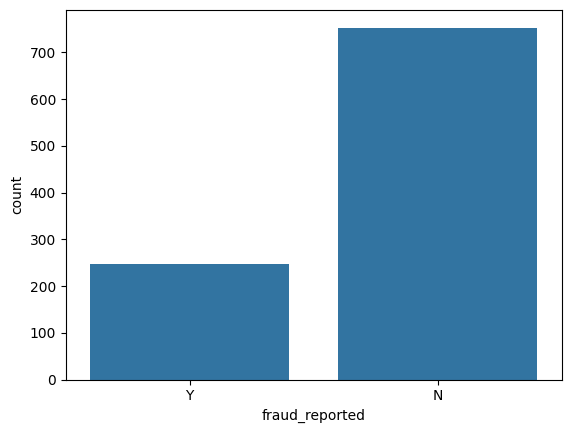

In [167]:
df['fraud_reported'].value_counts(normalize=True)
sns.countplot(x='fraud_reported', data=df)


In [168]:
df.isna().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [3]:
sns.countplot(x='insured_sex', data=df)

NameError: name 'df' is not defined

<Axes: xlabel='policy_annual_premium', ylabel='Count'>

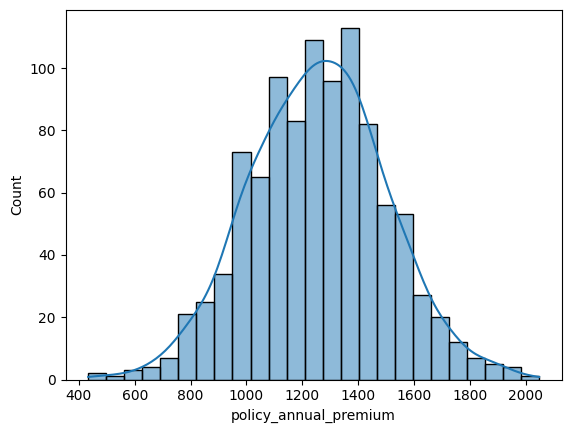

In [6]:
sns.histplot(df['policy_annual_premium'], kde=True)

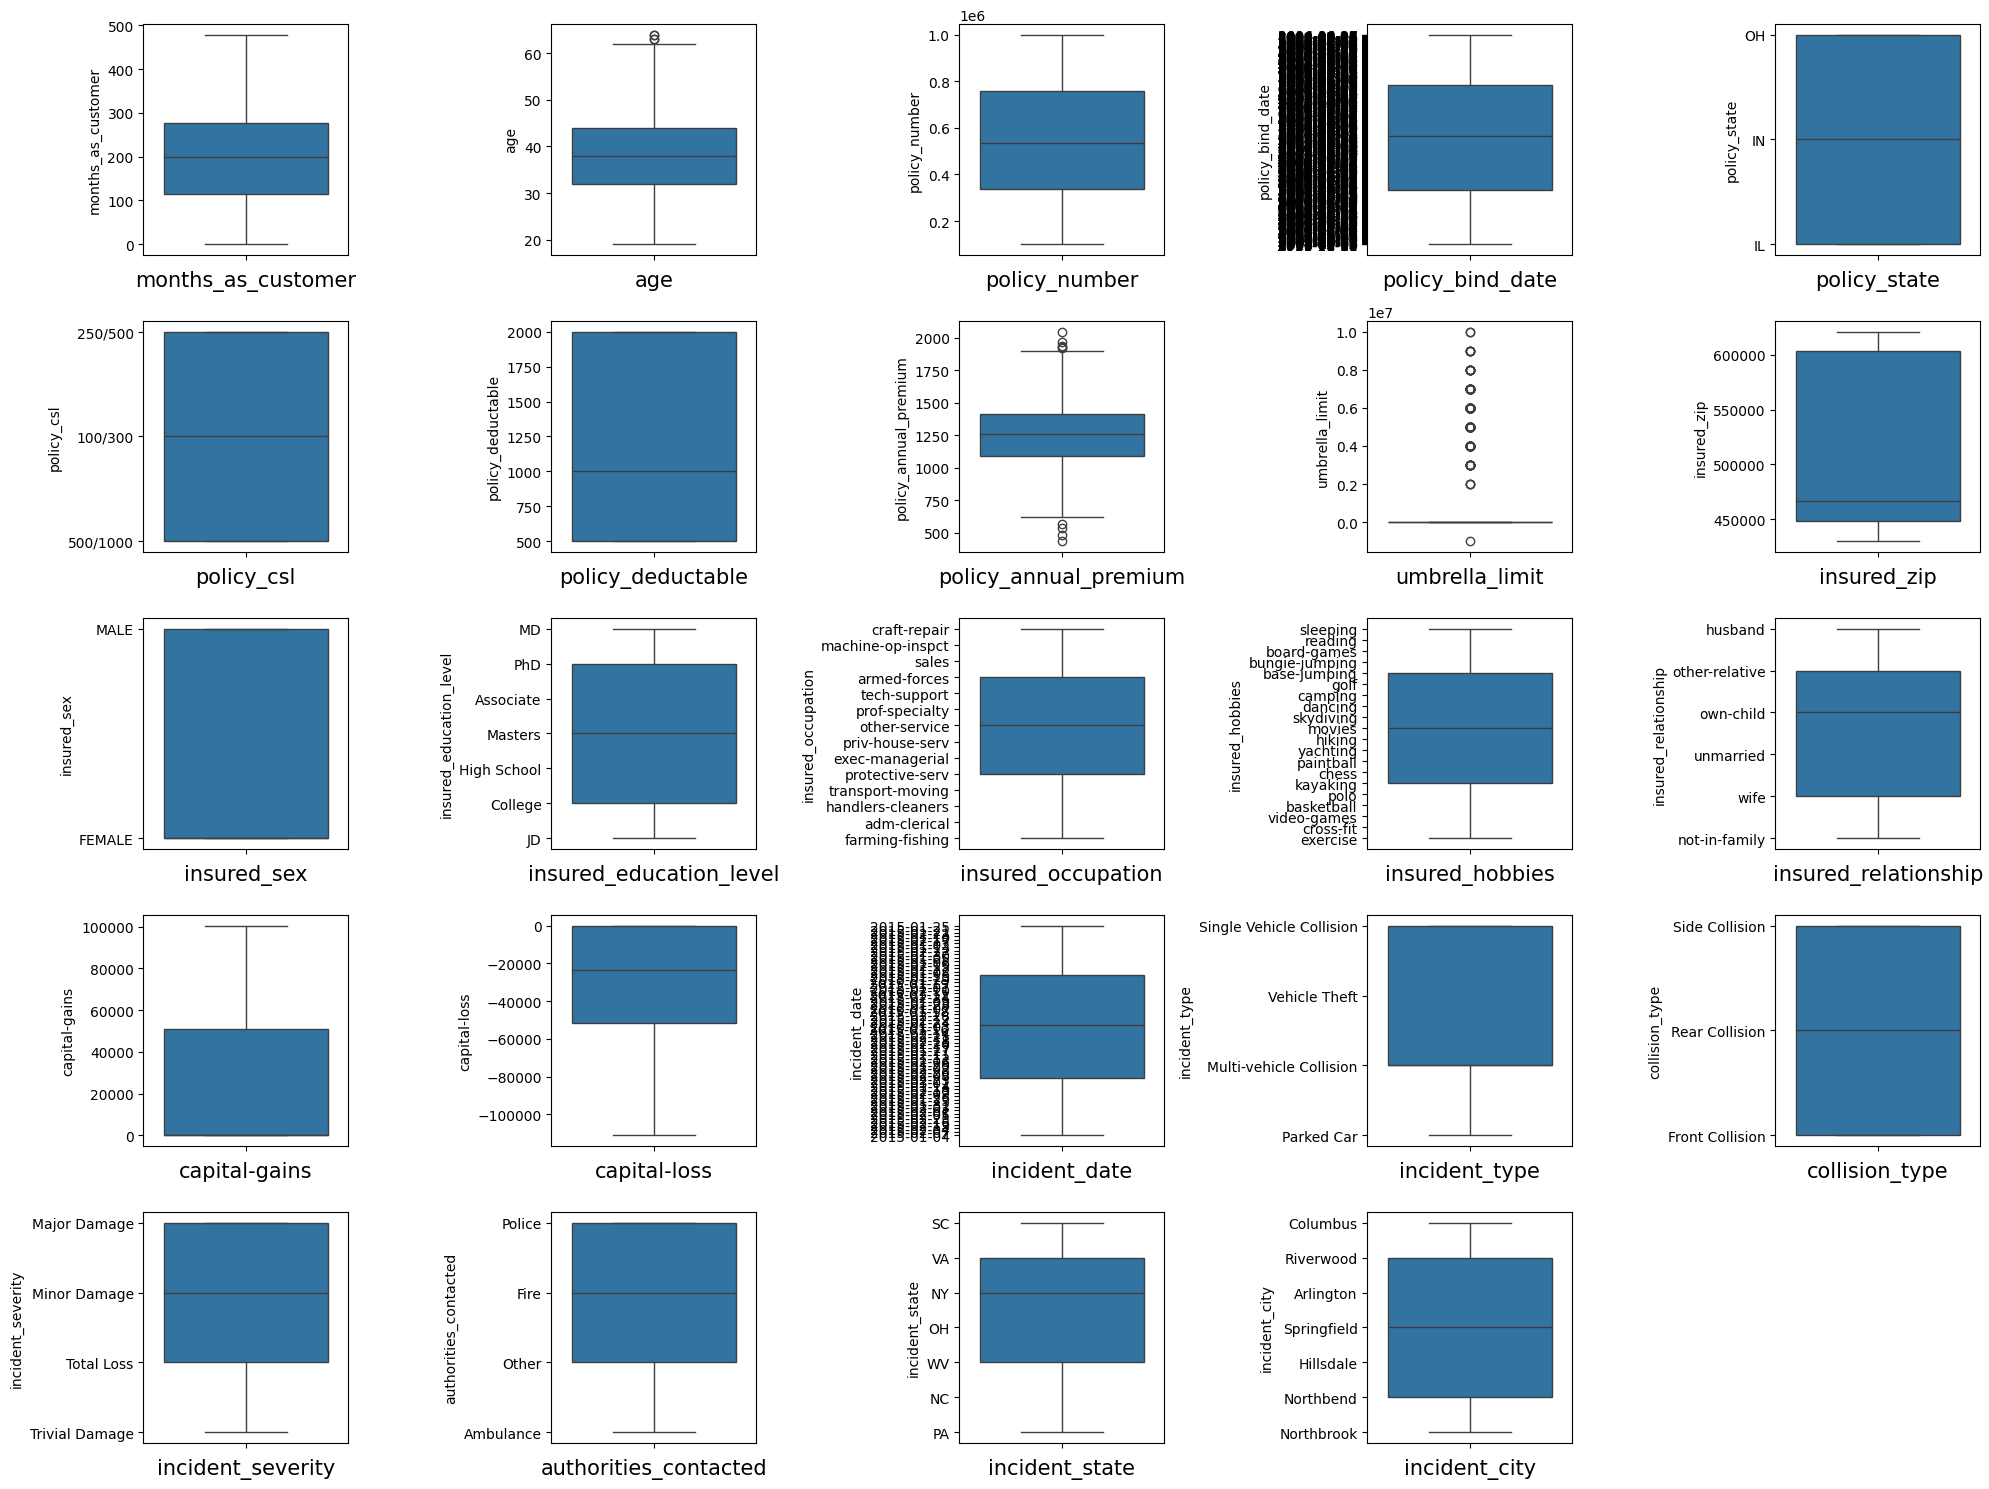

In [171]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in df:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show() #checking outliers

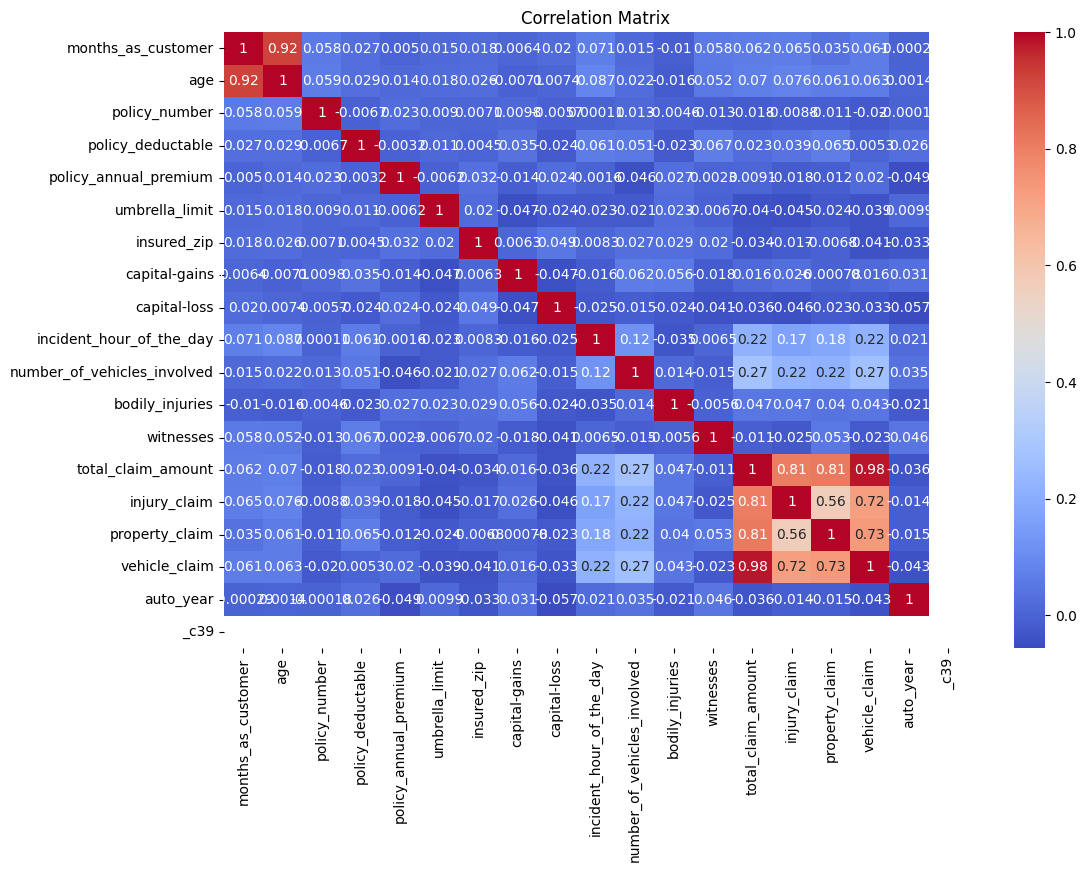

In [172]:
numeric_df = df.select_dtypes(include='number')

corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

months_as_customer and age are highly correlated.

Also there is high correlation between total_claim_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others.

We will drop age and total_claim_amount

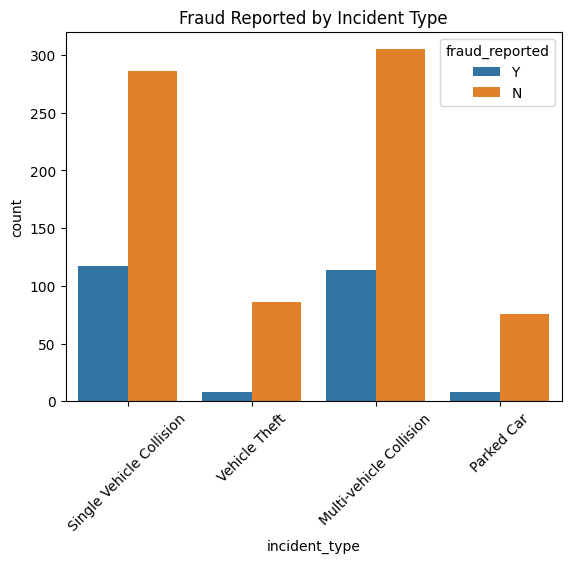

In [173]:
sns.countplot(x='incident_type', hue='fraud_reported', data=df)
plt.title("Fraud Reported by Incident Type")
plt.xticks(rotation=45)
plt.show()

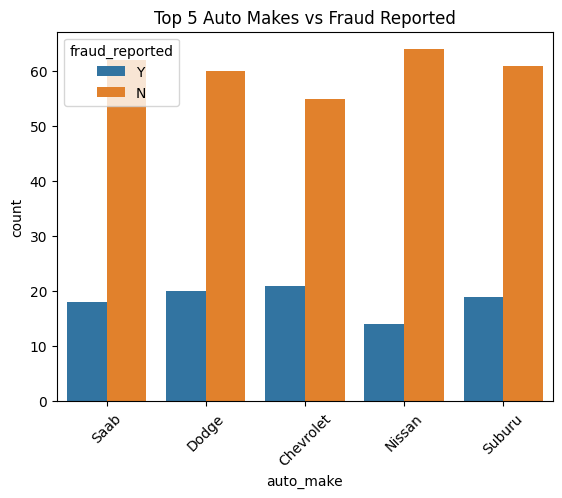

In [174]:
top_makes = df['auto_make'].value_counts().nlargest(5).index
sns.countplot(x='auto_make', hue='fraud_reported', data=df[df['auto_make'].isin(top_makes)])
plt.title("Top 5 Auto Makes vs Fraud Reported")
plt.xticks(rotation=45)
plt.show()

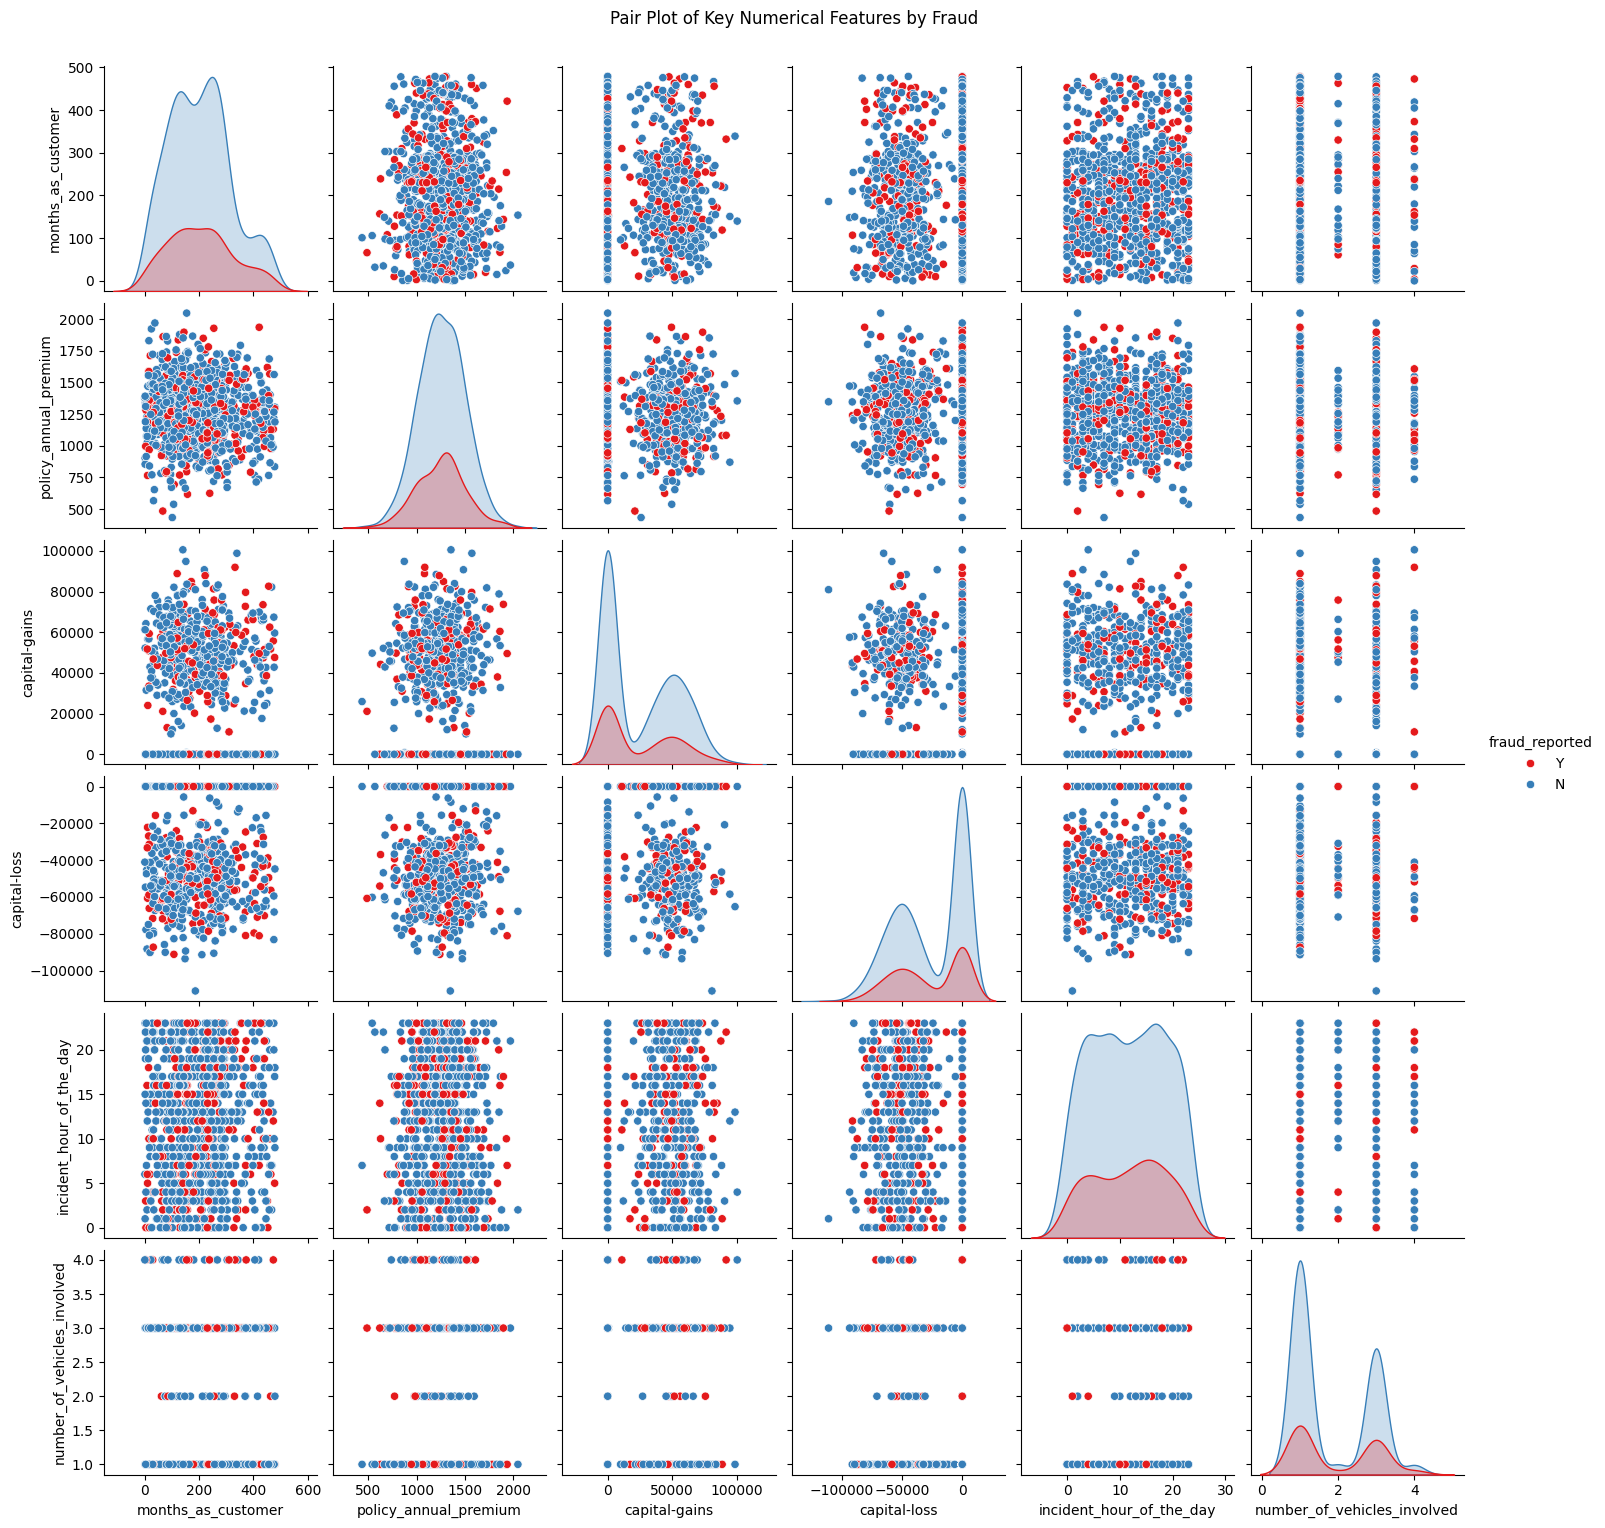

In [175]:

# Select relevant numeric features
selected_features = ['months_as_customer', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved']

df_pair = df[selected_features + ['fraud_reported']]

sns.pairplot(df_pair, hue='fraud_reported', palette='Set1', diag_kind='kde')
plt.suptitle("Pair Plot of Key Numerical Features by Fraud", y=1.02)
plt.show()


In [176]:
df.nunique()

,0
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [177]:
to_drop = ['policy_number', 'policy_bind_date', 'policy_state', 'insured_zip', 'incident_location',
           'incident_date', 'incident_state', 'incident_city', 'insured_hobbies', 'auto_model', '_c39', 'age', 'total_claim_amount', 'auto_make']

df.drop(to_drop, inplace=True, axis=1)



In [178]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,1,YES,1,2,YES,6510,13020,52080,2004,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,1,NaN,0,0,NaN,780,780,3510,2007,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,3,NO,2,3,NO,7700,3850,23100,2007,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,1,NaN,1,2,NO,6340,6340,50720,2014,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,1,NO,0,1,NO,1300,650,4550,2009,N


### HANDLING MISSING VALUES

All missing values are categorical and imputed with mode

In [179]:
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [180]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [181]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [182]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

### Feature Engineering

In [183]:
df[['policy_csl_lower', 'policy_csl_upper']] = df['policy_csl'].str.split('/', expand=True)
df['policy_csl_lower'] = pd.to_numeric(df['policy_csl_lower'], errors='coerce')
df['policy_csl_upper'] = pd.to_numeric(df['policy_csl_upper'], errors='coerce')


df.drop(columns=['policy_csl'], inplace=True)

In [184]:
df.isna().sum()

,0
months_as_customer,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_sex,0
insured_education_level,0
insured_occupation,0
insured_relationship,0
capital-gains,0
capital-loss,0


In [185]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [186]:
df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_csl_lower,policy_csl_upper
0,328,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,...,1,2,YES,6510,13020,52080,2004,Y,250,500
1,228,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,...,0,0,NO,780,780,3510,2007,Y,250,500
2,134,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,...,2,3,NO,7700,3850,23100,2007,N,100,300
3,256,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,...,1,2,NO,6340,6340,50720,2014,Y,250,500
4,228,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,...,0,1,NO,1300,650,4550,2009,N,500,1000


In [187]:
for col in categorical_cols:
    print(f"{col}: \n{df[col].unique()}\n")

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']

fraud_reported: 
['Y' 'N']



In [188]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

Encoding Categorical Variables

In [189]:
categorical_cols = [col for col in categorical_cols if col != 'fraud_reported']

In [190]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

## Prediction

Splitting Dataset

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Training using Decision Trees Classifier

Optimizing parameters using GridSearchCV

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Params: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report:
               precision    recall  f1-score   support

           N       0.89      0.84      0.86       188
           Y       0.58      0.68      0.62        62

    accuracy                           0.80       250
   macro avg       0.73      0.76      0.74       250
weighted avg       0.81      0.80      0.80       250



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan

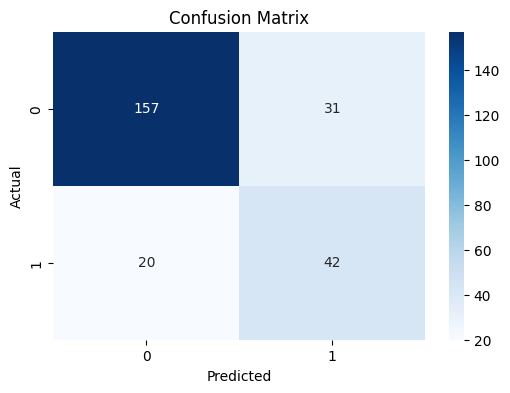

In [192]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Set up parameter grid for GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 8, 10, 12],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


base_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)


grid_search = GridSearchCV(
    estimator=base_tree,
    param_grid=param_grid,
    scoring='f1',         # Optimize for f1-score
    cv=5,
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)


best_dt = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)


y_pred = best_dt.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report:
               precision    recall  f1-score   support

           N       0.89      0.84      0.86       188
           Y       0.58      0.68      0.62        62

    accuracy                           0.80       250
   macro avg       0.73      0.76      0.74       250
weighted avg       0.81      0.80      0.80       250



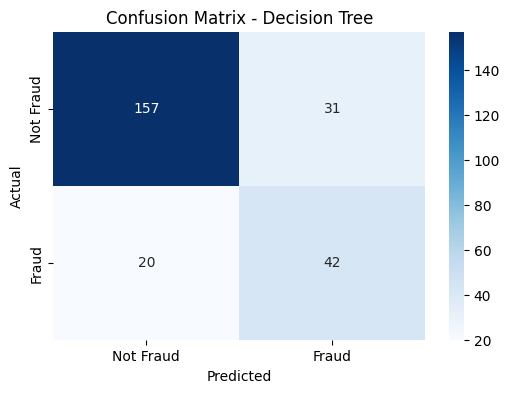

In [193]:
best_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [194]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))


Accuracy: 0.796


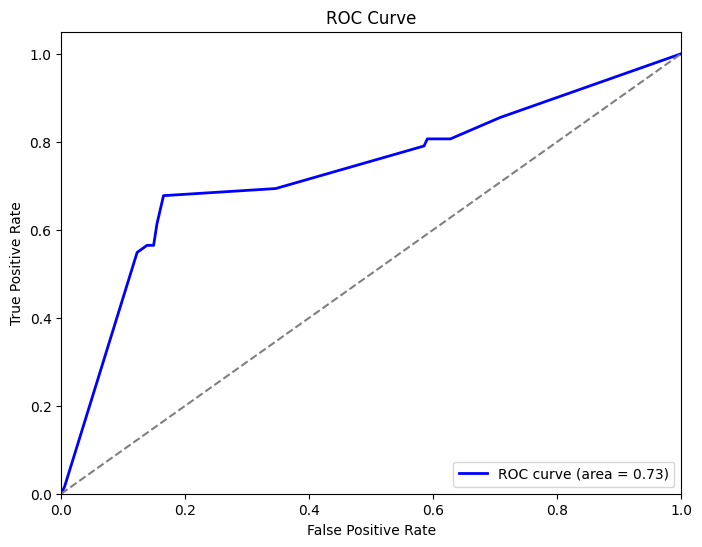

In [195]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to numeric (0 for 'N', 1 for 'Y')
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)


y_proba = best_dt.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Regression model to predict claim amount for vehicles

In [205]:
X = df.drop(['vehicle_claim', 'property_claim', 'injury_claim'], axis=1)
y = df['vehicle_claim']

In [206]:
categorical_cols.append('fraud_reported')

In [207]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RMSE: 106264109.37755
R² Score: 0.6895032946778531


In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 7971.99
MSE: 110925203.15
RMSE: 10532.10
R² Score: 0.68


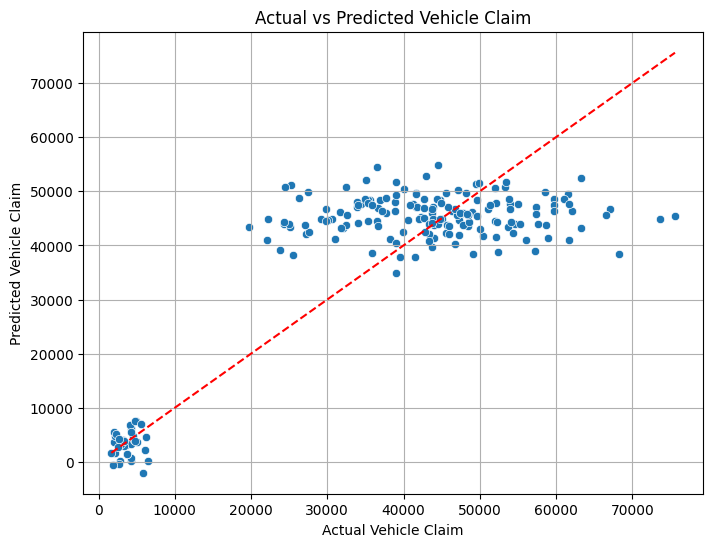

In [229]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Vehicle Claim")
plt.ylabel("Predicted Vehicle Claim")
plt.title("Actual vs Predicted Vehicle Claim")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()
